<a href="https://colab.research.google.com/github/Mayvei64/Piramida/blob/main/ML_Lab_Disbalanced_dataset/Disbalanced_dataset_Part_1_Matvei.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns

sns.set_palette('husl')
import matplotlib.pyplot as plt
%matplotlib inline

import matplotlib.patches as mpatches
import time

import collections
from collections import Counter

import warnings
warnings.filterwarnings("ignore")

# Информация о датасете

Датасет состоит из 284 807 строк и 31 стобца.

Набор данных содержит транзакции, совершенные по кредитным картам в сентябре 2013 года европейскими держателями карт. В этом наборе данных представлены транзакции, проведенные за два дня, где имеем 492 случаев мошенничества из 284 807 транзакций. Набор данных сильно несбалансирован, положительный класс (мошенники) составляет всего 0,172% от всех транзакций.

Столбцы:

V1 ,V2, . . ,V28 - это главные компоненты, полученные с помощью PCA.

Единственные характеристики, которые не были преобразованы с помощью PCA - это "Time" и "Amount"

Столбец "Time" содержит секунды, прошедшие между каждой транзакцией и первой транзакцией в наборе данных.

Столбец "Amount" - это сумма транзакции.

Столбец "Class" является переменной отклика и принимает значение 1 в случае мошенничества и 0 в противном случае.


<h2> Наши цели: </h2>
<ul>
<li> Проанализировать полученные данные. </li>
<li> Рассмотреть проблему сильного дисбаланса классов. </li>
<li> Использовать алгоритмы кластеризации </li>
<li> Использовать алгоритмы понижения размерности </li>


In [ ]:
from google.colab import drive
drive.mount('/content/drive/')
sns.set()
data = pd.read_csv("/content/drive/MyDrive/ColabNotebooks/MLandNeuro/creditcard.csv")
data.head()



Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


# Анализ данных

In [ ]:
# Проверка на пустые значения
data.isnull().sum()

# пустые значения отсутствуют

,0
Time,0
V1,0
V2,0
V3,0
V4,0
V5,0
V6,0
V7,0
V8,0
V9,0


In [ ]:
# основные статистические показатели
data.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.168375e-15,3.416908e-16,-1.379537e-15,2.074095e-15,9.604066e-16,1.487313e-15,-5.556467e-16,1.213481e-16,-2.406331e-15,...,1.654067e-16,-3.568593e-16,2.578648e-16,4.473266e-15,5.340915e-16,1.683437e-15,-3.660091e-16,-1.227390e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [ ]:
# название стобцов

data.columns

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')

Еще раз оценим отношение классов целевой переменной.

In [ ]:
sl = data['Class'].value_counts() # возвращает словарь

# ключ в этом словаре - уникальные значения в столбце Class
# value - сколько всего записей имело эти значения

positive_number = sl[0]
negative_number = sl[1]
summa = positive_number + negative_number

print(positive_number) # количество обычных транзакций
print(negative_number) # количество мошеннические транзакции
print(summa) # общее количество

284315
492
284807


In [ ]:
# вывод отношения классов целевой переменной

n_trans = (positive_number/summa) * 100 # в процентах
f_trans = (negative_number/summa) * 100 # в процентах


print(f'Обычные транзакции составляют : {n_trans} % данных')
print(f'Мошеннические транзакции составляют : { f_trans} % данных')

print()

print(f'Обычные транзакции составляют : { round(n_trans, 3) } % данных')
print(f'Мошеннические транзакции составляют : { round(f_trans, 3)} % данных')

Обычные транзакции составляют : 99.82725143693798 % данных
Мошеннические транзакции составляют : 0.1727485630620034 % данных

Обычные транзакции составляют : 99.827 % данных
Мошеннические транзакции составляют : 0.173 % данных


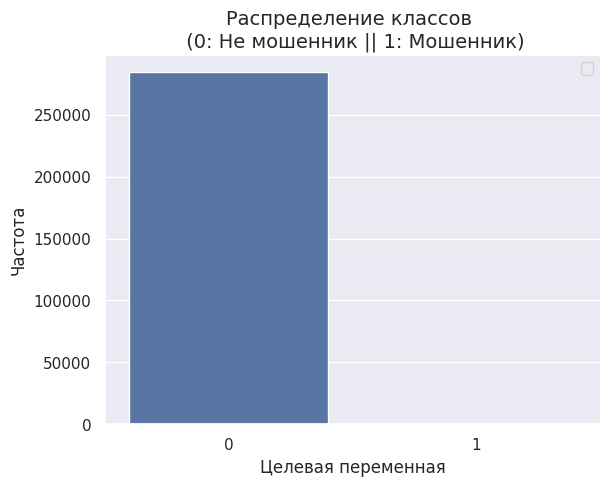

In [ ]:
# строим гистограмму целевой переменной:
sns.countplot(x = data["Class"])

# Настройка графика
plt.legend()
plt.xlabel('Целевая переменная')
plt.ylabel('Частота')
plt.title('Распределение классов \n (0: Не мошенник || 1: Мошенник)', fontsize=14)

# Отображение гистограмм
plt.show()



Построим распределения по суммам и времени транзакций.

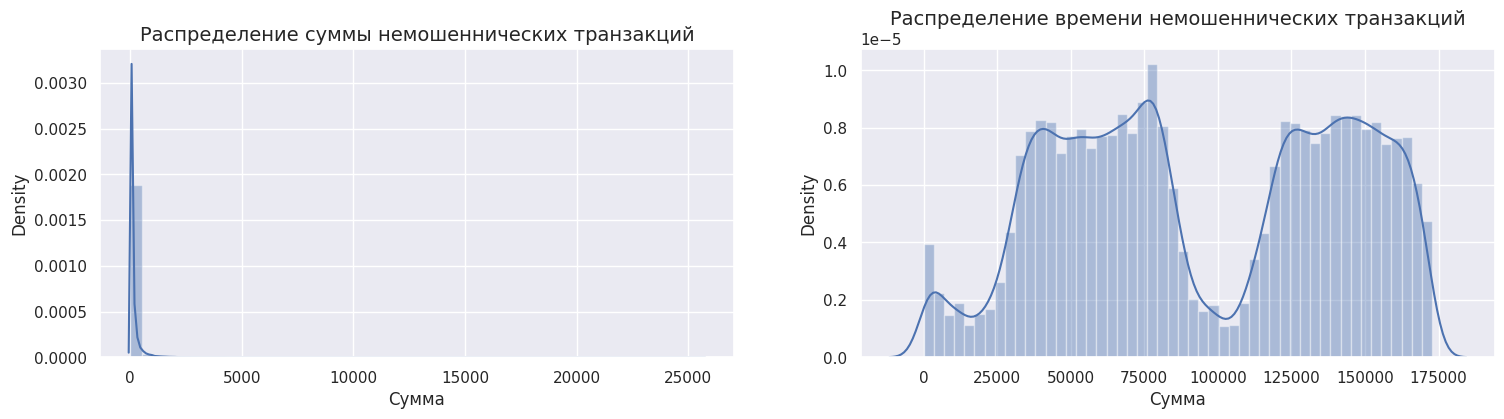

In [ ]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(18,4))


# немошеннические
amount_val_0 = data[data['Class'] == 0]['Amount']
time_val_0 = data[data['Class'] == 0]['Time']


# строим график распределения суммы транзакций
sns.distplot(amount_val_0, ax = ax1, hist=True)
ax1.set_title('Распределение суммы немошеннических транзакций', fontsize=14)
ax1.set_xlabel('Сумма', fontsize=12)

# строим график распределения времени транзакций
sns.distplot(time_val_0, ax = ax2, hist=True)
ax2.set_title('Распределение времени немошеннических транзакций', fontsize=14)
ax2.set_xlabel('Сумма', fontsize=12)

plt.show()





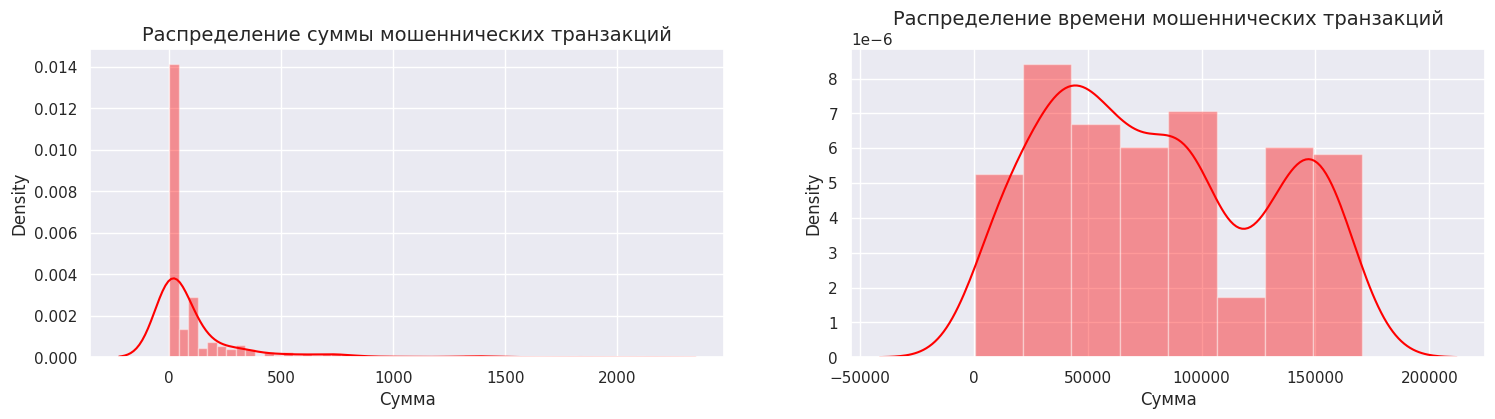

In [ ]:
fig, (ax3, ax4) = plt.subplots(1, 2, figsize=(18,4))

# мошеннические
amount_val_1 = data[data['Class'] == 1]['Amount']
time_val_1 = data[data['Class'] == 1]['Time']

# строим график распределения суммы транзакций
sns.distplot(amount_val_1, ax = ax3, hist=True, color = 'red')
ax3.set_title('Распределение суммы мошеннических транзакций', fontsize=14)
ax3.set_xlabel('Сумма', fontsize=12)

# строим график распределения времени транзакций
sns.distplot(time_val_1, ax = ax4, hist=True, color = 'red')
ax4.set_title('Распределение времени мошеннических транзакций', fontsize=14)
ax4.set_xlabel('Сумма', fontsize=12)

plt.show()


#Масштабирование

Первым делом нам необходимо отмасштабировать столбцы **Time** и **Amount**. Поскольку все остальные признаки уже отмасштабированы. Однако делать это нужно только строго **после** разбиения на обучающую выборку и тестовую.

Затем необходимо создать подвыборку из наших данных, чтобы иметь равное количество случаев мошенничества и не мошенничества, что поможет нашим моделям лучше понять закономерности, определяющие, является ли транзакция мошенничеством или нет.

### Зачем создавать подвыборку?
Наши данные имеют сильный дисбаланс. Использование исходного датасета приведет к следующим проблемам:
  - **Переобучение**: Наши модели классификации будут предполагать, что в большинстве случаев мошенничества не существует! Мы хотим, чтобы наша модель точно определяла, когда происходит мошенничество.
  - **Неверные корреляции:** Хотя мы не знаем, что обозначают признаки "V", будет полезно понять, как каждый из этих признаков влияет на результат (мошенничество или отсутствие мошенничества), поскольку, имея несбалансированный набор данных, мы не можем увидеть истинные корреляции между целевой переменной и признаками.

Разделение данных

In [ ]:
from sklearn.model_selection import train_test_split
# Поскольку большая часть наших данных уже масштабирована, мы должны масштабировать столбцы,
# которые остались (Amount и Time)
from sklearn.preprocessing import RobustScaler

rob_scaler = RobustScaler() # Менее чувствителен к выбросам, чем просто стандартизация

X = data.drop('Class', axis=1)
y = data['Class']

original_Xtrain, original_Xtest, original_ytrain, original_ytest = train_test_split(X, y, test_size=0.2,
                                                                                    random_state = 42)

# Посмотрим, какие типы данных возвращаются после разделения:
rt_tmp = original_Xtrain['Amount']
print (f'Тип данных original_Xtrain["Amount"] {type(rt_tmp)}')
print (f'Тип данных original_Xtrain["Amount"].values {type(rt_tmp.values)}')
print (f'Данные original_Xtrain["Amount"].values {rt_tmp.values}')
print (f'Тип данных original_Xtrain["Amount"].values.reshape(-1,1) {type(rt_tmp.values.reshape(-1,1))}')
print (f'Данные original_Xtrain["Amount"].values.reshape(-1,1) \n{rt_tmp.values.reshape(-1,1)} \n')

# Преобразование столбцов
original_Xtrain['scaled_amount'] = rob_scaler.fit_transform(original_Xtrain['Amount'].values.reshape(-1,1))
original_Xtest['scaled_amount'] = rob_scaler.fit_transform(original_Xtest['Amount'].values.reshape(-1,1))

original_Xtrain['scaled_time'] = rob_scaler.fit_transform(original_Xtrain['Time'].values.reshape(-1,1))
original_Xtest['scaled_time'] = rob_scaler.fit_transform(original_Xtest['Time'].values.reshape(-1,1))


original_Xtrain.drop(['Time','Amount'], axis=1, inplace=True)
original_Xtest.drop(['Time','Amount'], axis=1, inplace=True)

original_Xtrain = original_Xtrain.values
original_Xtest = original_Xtest.values
original_ytrain = original_ytrain.values
original_ytest = original_ytest.values

train_unique_label, train_counts_label = np.unique(original_ytrain, return_counts=True)
test_unique_label, test_counts_label =  np.unique(original_ytest, return_counts=True)

print('Распределение классов: \n')
print("Обучающий набор:", train_counts_label/ len(original_ytrain))
print("Тестовый набор:", test_counts_label/ len(original_ytest))

Тип данных original_Xtrain["Amount"] <class 'pandas.core.series.Series'>
Тип данных original_Xtrain["Amount"].values <class 'numpy.ndarray'>
Данные original_Xtrain["Amount"].values [  9.99  45.9   11.99 ...   3.94   1.   113.  ]
Тип данных original_Xtrain["Amount"].values.reshape(-1,1) <class 'numpy.ndarray'>
Данные original_Xtrain["Amount"].values.reshape(-1,1) 
[[  9.99]
 [ 45.9 ]
 [ 11.99]
 ...
 [  3.94]
 [  1.  ]
 [113.  ]] 

Распределение классов: 

Обучающий набор: [0.99827075 0.00172925]
Тестовый набор: [0.99827955 0.00172045]


## Метод Random Under-Sampling

Применим метод Random Under-Sampling, который случайным образом удаляет объекты доминирующего класса и выравнивает соотношение классов.

Алгоритм:
- Определяем степень несбалансированности (посчитали количество меток одного и другого класса выше)

- Как только мы определим, сколько случаев считаются мошенническими операциями (Fraud = "1"), мы должны довести количество немошеннических операций до того же количества, что и мошеннических (мы хотим получить соотношение 50/50 между классами), то есть это в подвыборке будет 492 случая мошенничества и 492 случая немошеннических операций.

- После применения этого метода мы получим подвыборку нашего набора данных с соотношением 50/50 в отношении наших классов. Наконец, не забудем перемешать наши данные для того, чтобы модели не зависили от порядка входных данных.
Важно!


Основная проблема данного метода заключается в том, что мы рискуем тем, что наши модели классификации не будут работать так точно, как нам хотелось бы, поскольку происходит большая потеря информации (выделение всего 492 немошеннических транзакций из 284 315 немошеннических транзакций).

In [ ]:
# Поскольку наши классы сильно не сбалансированы, мы должны сделать их эквивалентными,
# чтобы получить нормальное распределение классов.

# Перемешаем данные перед созданием подвыборок

df = data.sample(frac=1)

fraud_df = df.loc[df['Class'] == 1]
non_fraud_df = df.loc[df['Class'] == 0][:492] # берем последние 492 транзакции

normal_distributed_df = pd.concat([fraud_df, non_fraud_df])

# Перемешивание строк датасета
new_df = normal_distributed_df.sample(frac=1, random_state=42)

new_df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
284536,172539.0,-5.823560,0.333130,-0.732746,0.770116,-3.785871,2.124706,-2.272833,2.896201,0.552732,...,-0.384073,-0.204040,-1.113031,0.258388,0.732836,-0.231069,-0.049823,-0.019875,150.00,0
197586,132086.0,-0.361428,1.133472,-2.971360,-0.283073,0.371452,-0.574680,4.031513,-0.934398,-0.768255,...,0.110815,0.563861,-0.408436,-0.880079,1.408392,-0.137402,-0.001250,-0.182751,480.72,1
246358,153137.0,-0.467034,1.466217,-0.485304,0.799226,0.798635,-0.343890,0.931311,0.333583,-0.991707,...,0.175226,0.657323,-0.295365,-0.461784,0.057261,-0.363733,0.307931,0.165765,8.78,0
6336,7543.0,0.329594,3.712889,-5.775935,6.078266,1.667359,-2.420168,-0.812891,0.133080,-2.214311,...,0.156617,-0.652450,-0.551572,-0.716522,1.415717,0.555265,0.530507,0.404474,1.00,1
150661,93853.0,-6.185857,7.102985,-13.030455,8.010823,-7.885237,-3.974550,-12.229608,4.971232,-4.248307,...,2.502772,0.481691,0.480958,0.360319,-0.293354,-0.199193,-0.203917,0.398927,44.90,1


In [ ]:
df.to_csv("/content/drive/MyDrive/ColabNotebooks/MLandNeuro/creditcard_full.csv")

In [ ]:
new_df.shape

(984, 31)

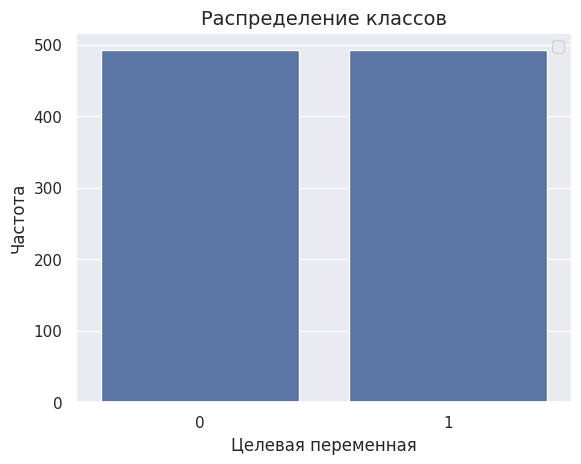

In [ ]:
# проверяем снова распределение классов

# строим гистограмму целевой переменной:
sns.countplot(x = new_df["Class"])

# Настройка графика
plt.legend()
plt.xlabel('Целевая переменная')
plt.ylabel('Частота')
plt.title('Распределение классов', fontsize=14)

# Отображение гистограмм
plt.show()

##Матрица корреляций

Корреляционные матрицы очень важны для понимания данных. Мы хотим узнать, есть ли признаки, которые оказывают сильное влияние на то, является ли конкретная транзакция мошенничеством. Однако важно, чтобы мы использовали сбалансированную подвыборку, чтобы увидеть, какие признаки имеют высокую положительную или отрицательную корреляцию в отношении мошеннических операций.

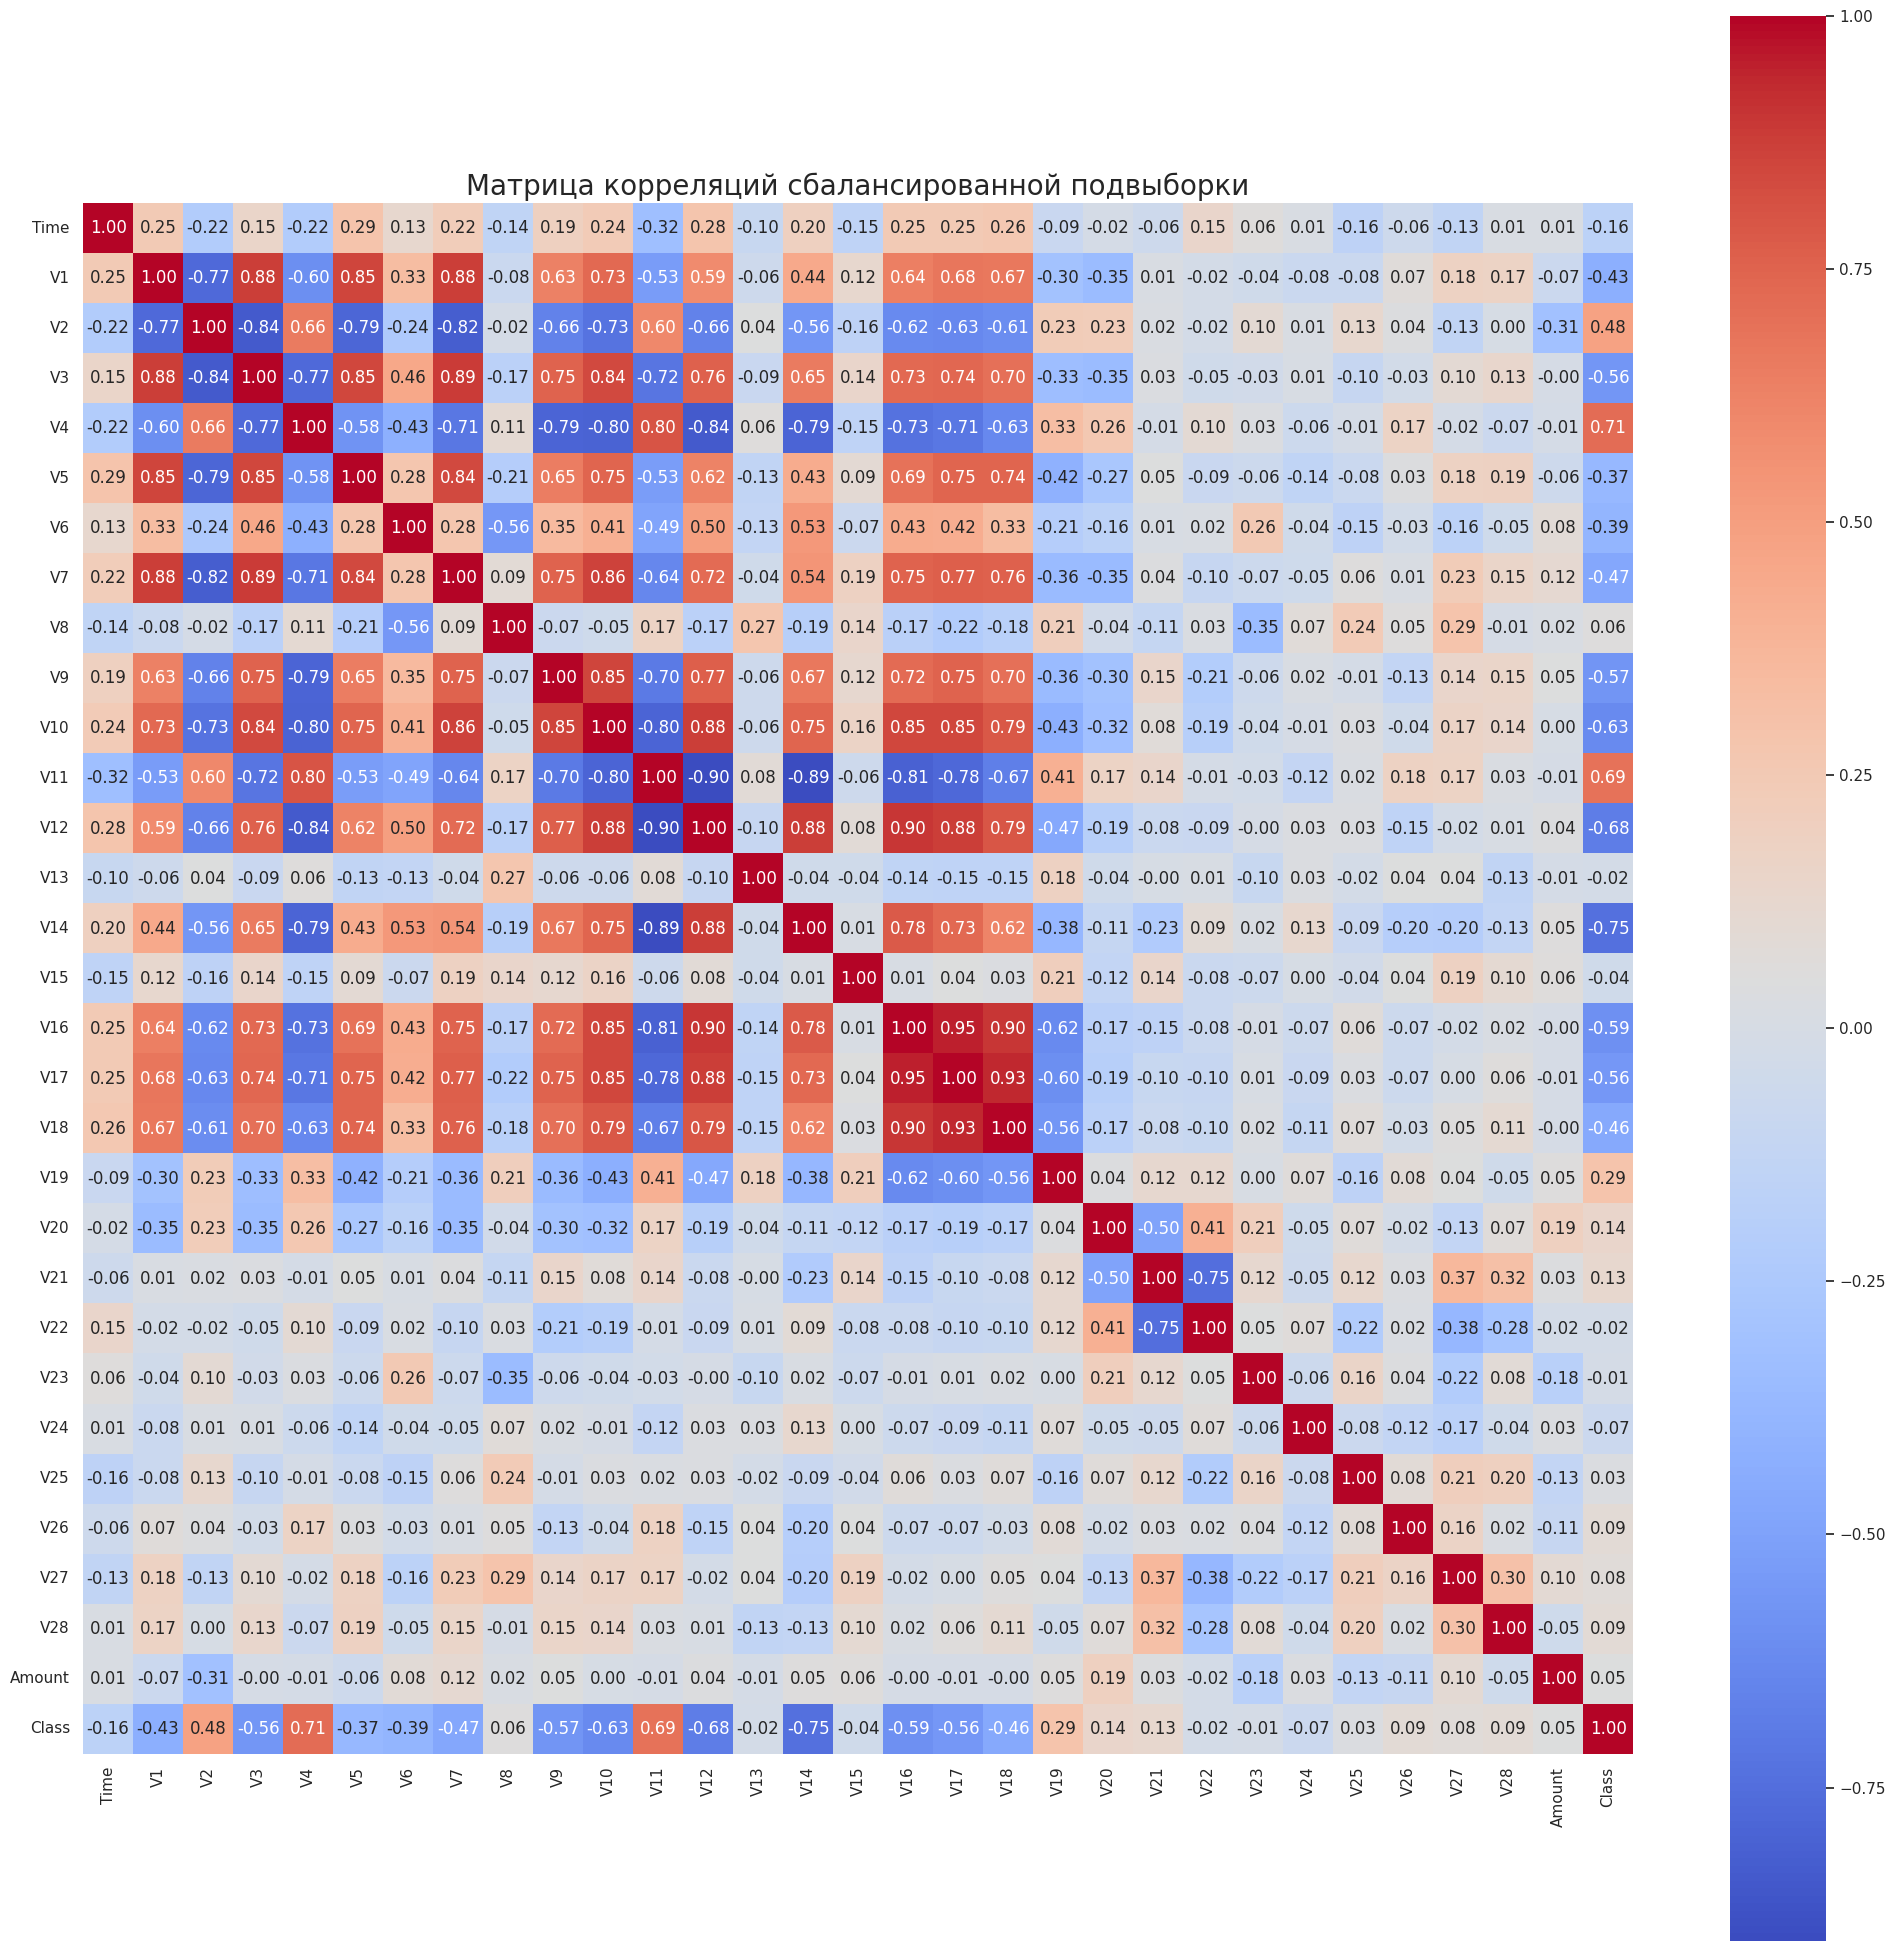

In [ ]:
corr = new_df.corr()

plt.figure(figsize = (25, 25))
sns.heatmap(corr, annot = True, cmap = 'coolwarm', fmt='.2f', square=True)
plt.title('Матрица корреляций сбалансированной подвыборки', fontsize=20)
plt.show()

##Построим теперь Boxplot.

### Выводы:
<ul>
<li><b>Отрицательные корреляции: </b> Какие признаки  имеют отрицательную корреляцию? Другими словами, чем ниже эти значения, тем больше вероятность того, что конечным результатом будет мошенническая операция.  </li>
<li> <b> Положительные корреляции: </b> Какие признаки  положительно коррелируют? То есть, чем выше эти значения, тем больше вероятность того, что конечным результатом будет мошенническая операция. </li>
</ul>


**Важно!**

Всегда проверяйте, используете ли вы сбалансированную подвыборку в корреляционной матрице, иначе на корреляционную матрицу повлияет сильный дисбаланс между классами.


[['V2', 'V3'], ['V2', 'V7'], ['V4', 'V12'], ['V11', 'V12'], ['V11', 'V14'], ['V11', 'V16']]


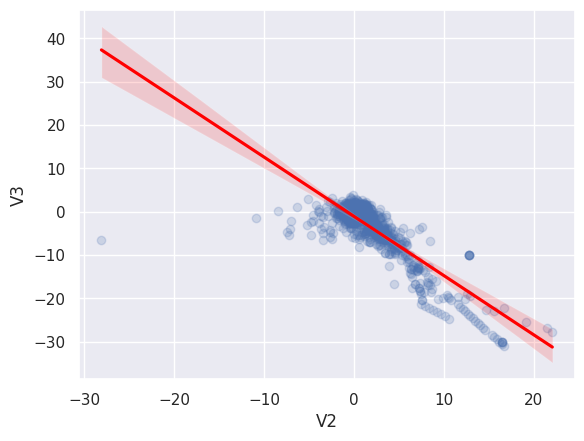

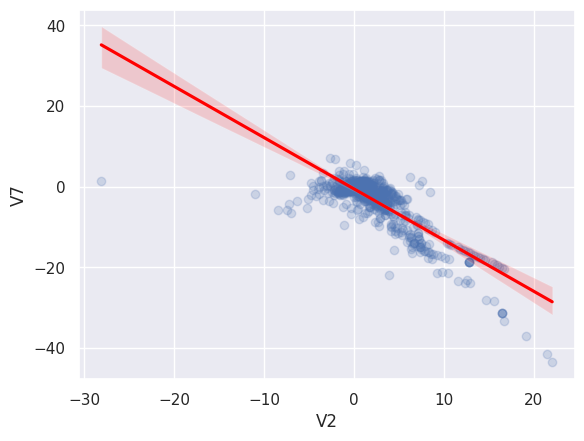

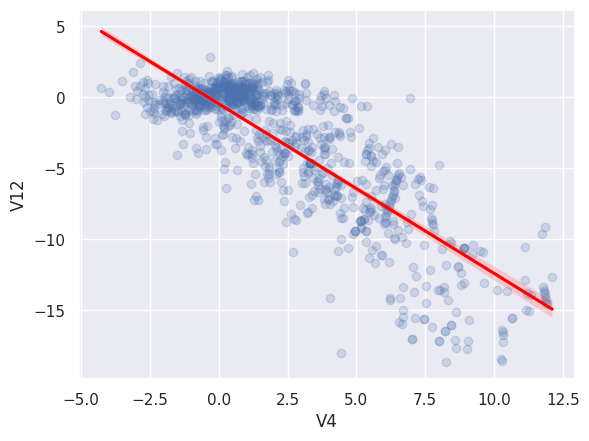

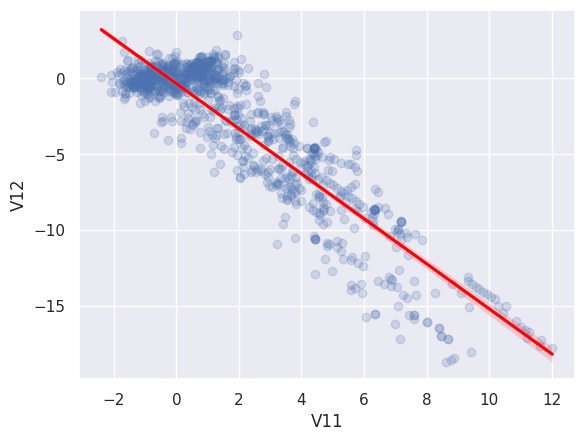

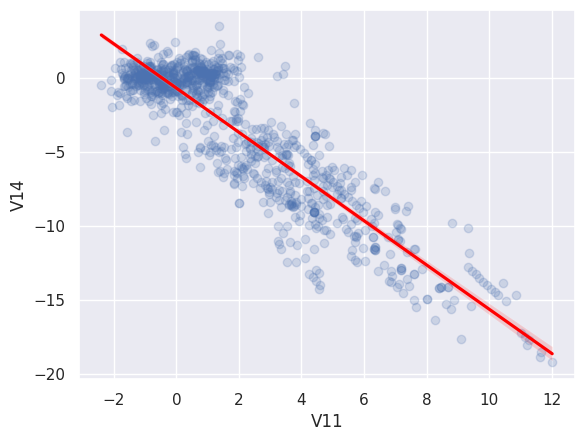

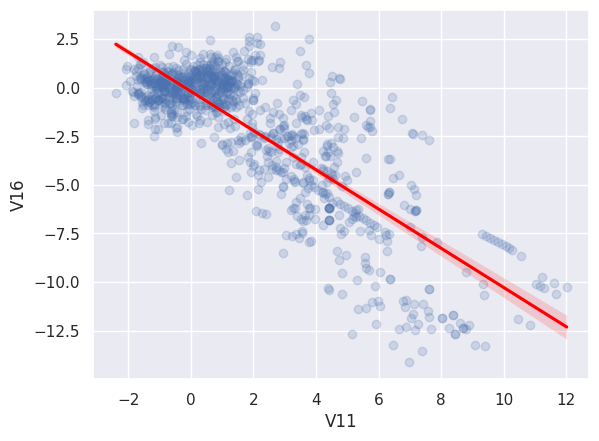

In [ ]:
# Выбираем пары с сильной отрицательной корреляцией (например, корреляция < -0.7)

neg_corr_pairs = []

# Найдем все пары с хорошой отрицательной корреляцией
for i in range(len(corr.columns)):
    for j in range(i+1, len(corr.columns)):
        if corr.iloc[i, j] < -0.8:
            neg_corr_pairs.append([corr.columns[i], corr.columns[j]])


print(neg_corr_pairs)

for i in range(0, len(neg_corr_pairs)):
  a = neg_corr_pairs[i]
  sns.regplot(x = a[0], y = a[1], data = new_df, scatter_kws = {'alpha' : 0.2}, line_kws = {'color' : 'red'}  )
  plt.show()

6


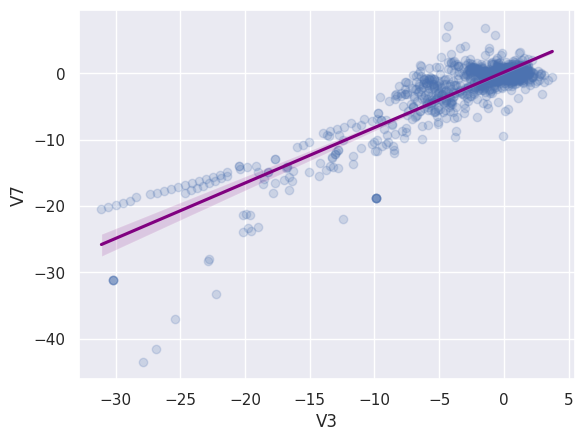

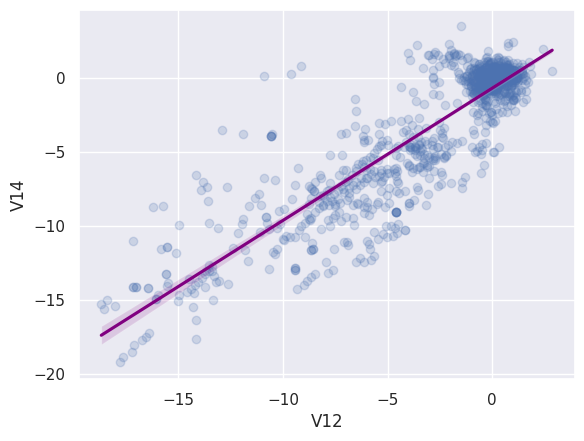

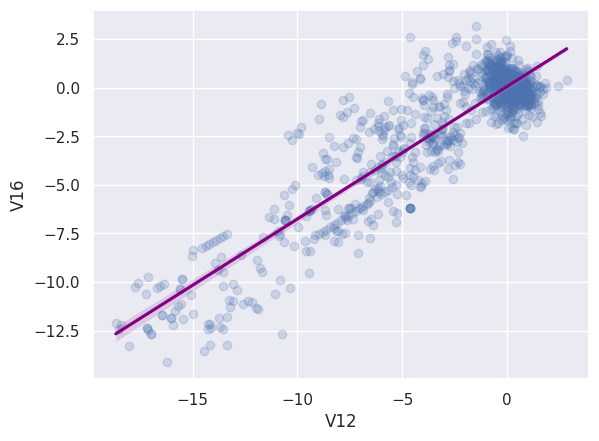

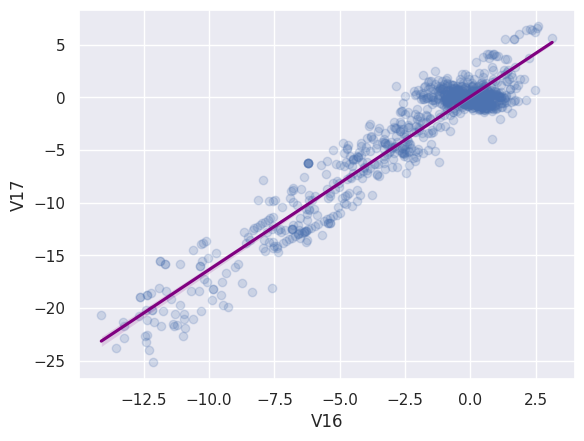

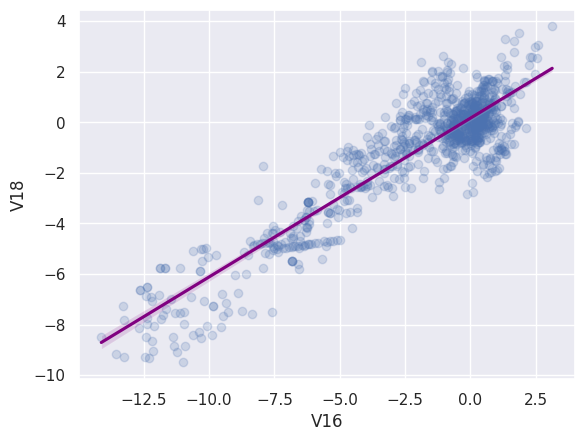

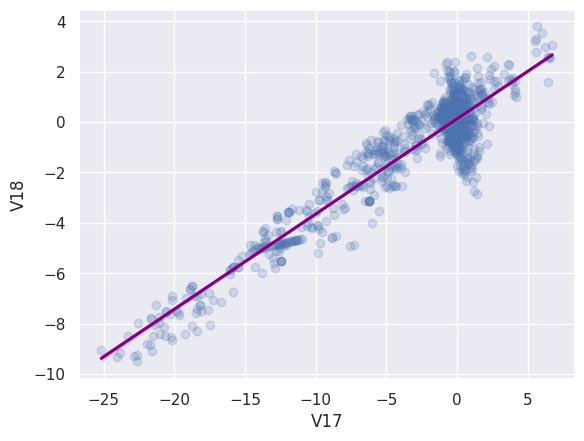

In [ ]:
# Выбираем пары с сильной положительной корреляцией

pos_corr_pairs = []

# Найдем все пары с хорошой положительной корреляцией
for i in range(len(corr.columns)):
    for j in range(i+1, len(corr.columns)):
        if corr.iloc[i, j] > 0.88:
            pos_corr_pairs.append([corr.columns[i], corr.columns[j]])


print(len(pos_corr_pairs))


for i in range(0, len(pos_corr_pairs)):
  a = pos_corr_pairs[i]
  sns.regplot(x = a[0], y = a[1], data = new_df, scatter_kws = {'alpha' : 0.2}, line_kws = {'color' : 'purple'}  )
  plt.show()


## Обработка выбросов

Наша основная цель в этом разделе - удалить выбросы из признаков, которые имеют высокую корреляцию с целевой переменной. Это положительно скажется на точности наших моделей.


### Метод межквартильного размаха:
<ul>
<li> <b>Interquartile Range (IQR): </b> Рассчитываем разницу между 75-м процентилем и 25-м процентилем. Наша цель - создать порог за пределами 75-го и 25-го процентилей, чтобы в случае, если какой-то экземпляр выборки преодолеет этот порог, он был удален.  </li>
<li> <b>Построить Boxplots: </b> С помощью boxplot легко увидеть 25-й и 75-й процентили и выбросы. </li>
</ul>

Надо быть внимательным к тому, как далеко мы хотим установить порог для удаления выбросов. Мы определяем порог путем умножения числа (например, 1.5) на интерквартильный размах. Чем выше этот порог, тем меньше выбросов будет обнаружено, а чем ниже этот порог, тем больше выбросов будет обнаружено.  <br><br>

Мы хотим больше сосредоточиться именно на сильных выбросах, а не просто на выбросах. Почему? Потому что удалив все выбросы, мы можем столкнуться с риском потери информации, что приведет к снижению точности наших моделей.


### Итого:
<ul>
<li> <b> Строим распределения </b>  </li>
<li><b>Определяем порог </b> </li>
<li> <b>Удаляем выбросы </b> </li>
<li> <b> Строим Boxplot </b> </li>
</ul>

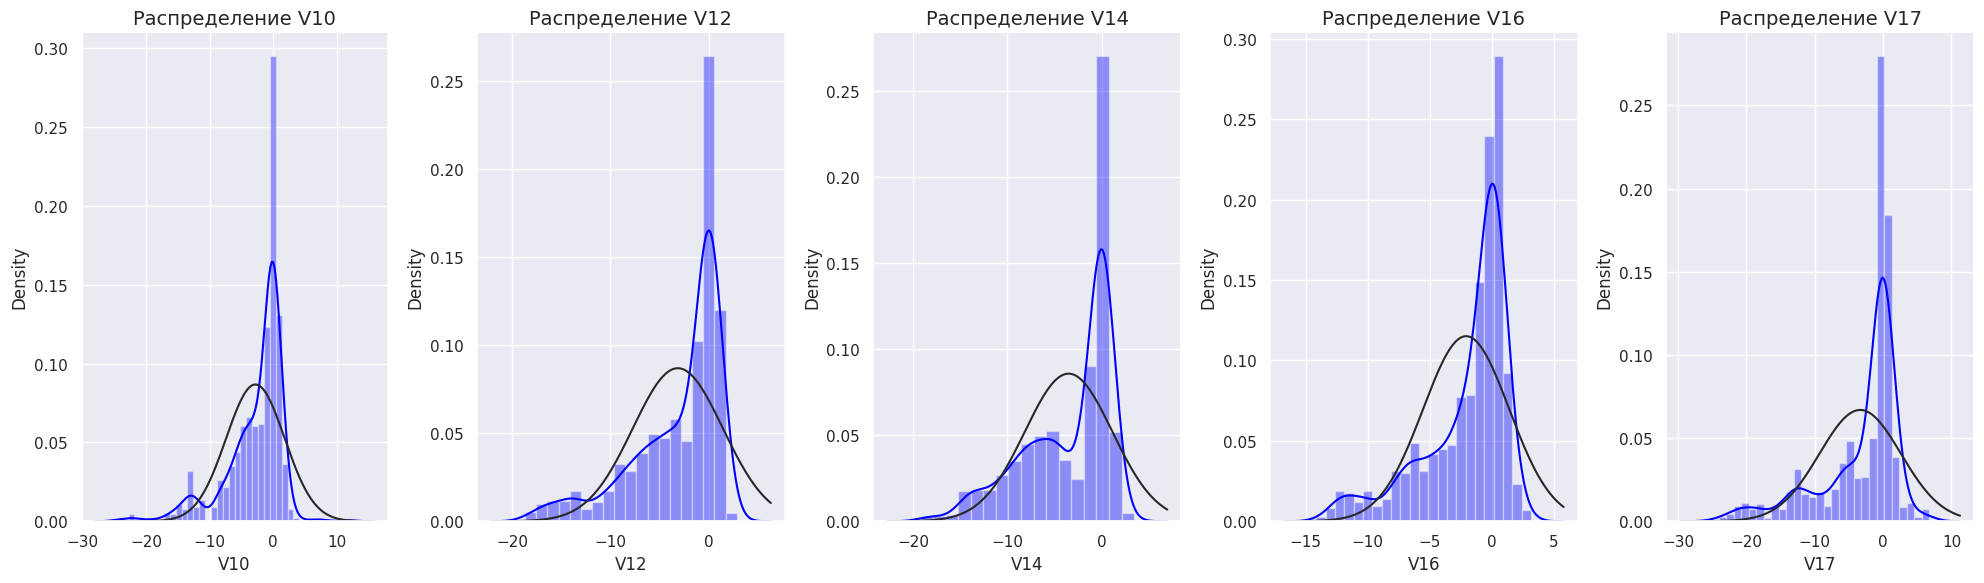

In [ ]:
# Строим распределения для признаков с отрицательной корреляцией

from scipy.stats import norm

f, (ax1, ax2, ax3, ax4, ax5) = plt.subplots(1, 5, figsize=(20, 6))

features = ['V10', 'V12', 'V14', 'V16', 'V17']
axes = [ax1, ax2, ax3, ax4, ax5]

# fit=norm добавляет кривую нормального распределения

for i in range(0, len(axes)):
  sns.distplot(new_df[features[i]], ax = axes[i], fit=norm, kde=True, color = 'blue')
  axes[i].set_title(f'Распределение {features[i]}', fontsize=14)
  axes[i].set_xlabel(f'{features[i]}', fontsize=12)

plt.tight_layout()
plt.show()

Квартили – значения, которые делят упорядоченную выборку на четыре примерно равные части. В первую часть входят первые 25% наблюдений, во вторую часть входят следующие 25% наблюдений и так далее. Таким образом, первый квартиль отделяет первые
25% значений в вариационном ряду, второй квартиль – первые 50% значений в вариационном ряду, третий квартиль – первые 75% значений, и наконец, четвертый квартиль
отделяет 100% значений, то есть все наблюдения в выборке.


Метод межквартильного размаха - это статистический метода, на основе которого рассчитывается покатзатель(межквартильный размах), который характеризует разброс данных.

q25 - 25- ый квартиль(нижний квартиль) - значения, большо которого будет 75% наблюдений

q75 - 75 - ый(верхний квартиль) - значения, большо которого будет 25% наблюдений


In [ ]:
# Удаление выбросов из признака V17
v17_fraud = new_df['V17'].loc[new_df['Class'] == 1].values
q25, q75 = np.percentile(v17_fraud, 25), np.percentile(v17_fraud, 75)
print('Квартиль 25: {} | Квартиль 75: {}'.format(q25, q75))
v17_iqr = q75 - q25
print('iqr: {}'.format(v17_iqr))

v17_cut_off = v17_iqr * 1.5
v17_lower, v17_upper = q25 - v17_cut_off, q75 + v17_cut_off
print('Порог: {}'.format(v17_cut_off))
print('V17 нижняя граница: {}'.format(v17_lower))
print('V17 верхняя граница: {}'.format(v17_upper))

outliers = [x for x in v17_fraud if x < v17_lower or x > v17_upper]
print('Количество выбросов: {}'.format(len(outliers)))

new_df_without_outliers  = new_df.drop(new_df[(new_df['V17'] > v17_upper) | (new_df['V17'] < v17_lower)].index)
print('----' * 44)

Квартиль 25: -11.945057187644576 | Квартиль 75: -1.34193993162032
iqr: 10.603117256024255
Порог: 15.904675884036383
V17 нижняя граница: -27.84973307168096
V17 верхняя граница: 14.562735952416062
Количество выбросов: 0
--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------


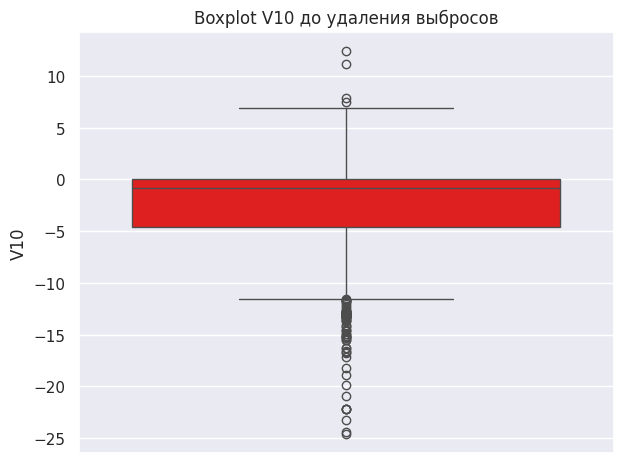

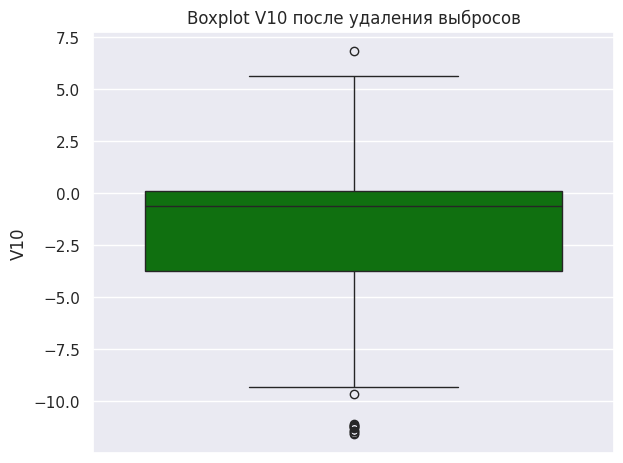

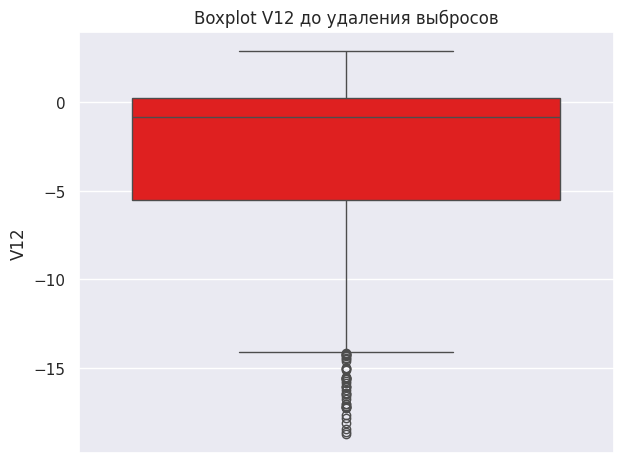

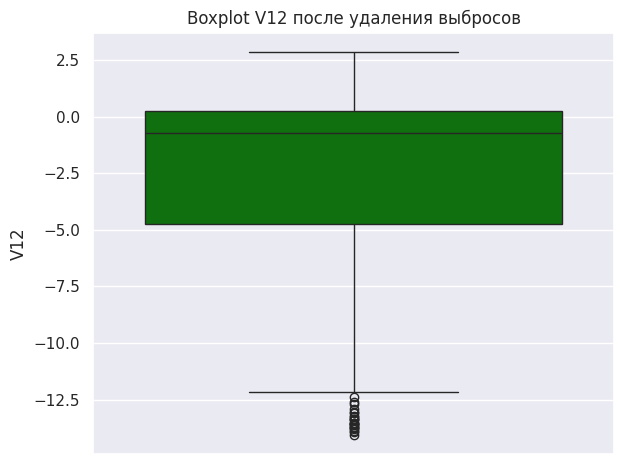

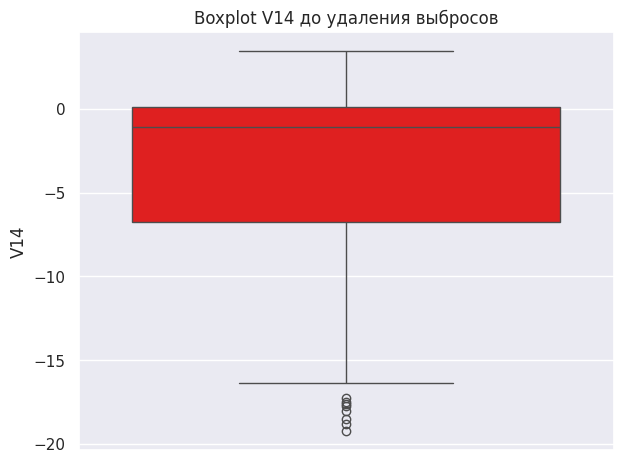

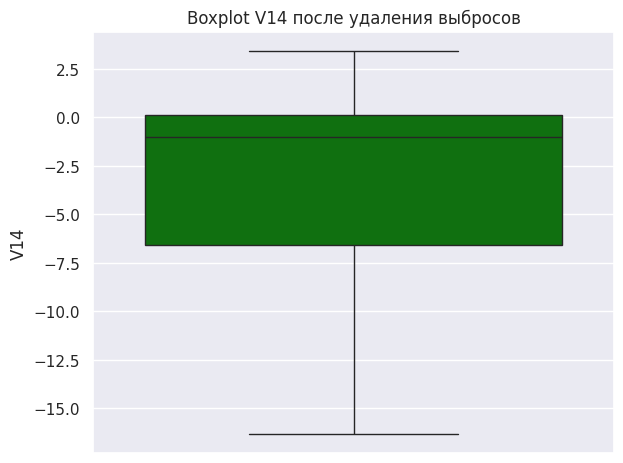

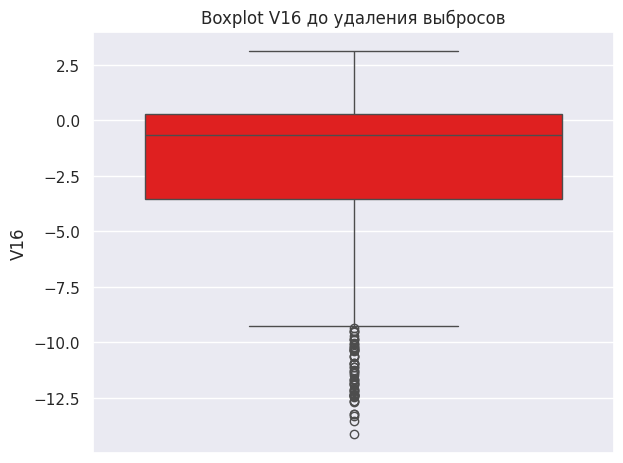

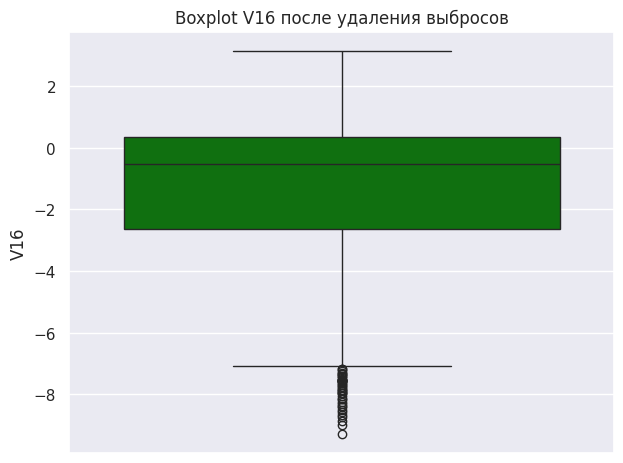

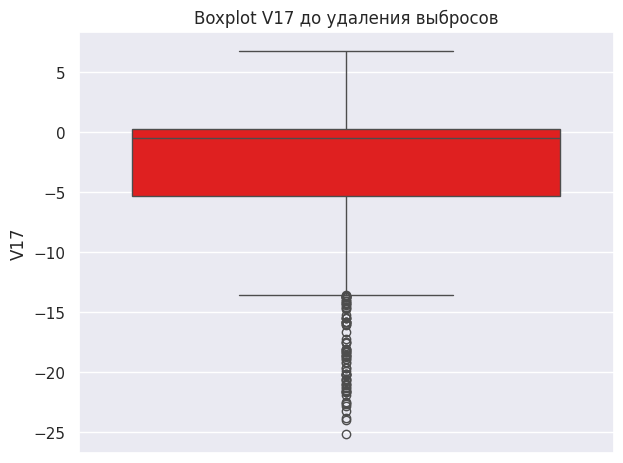

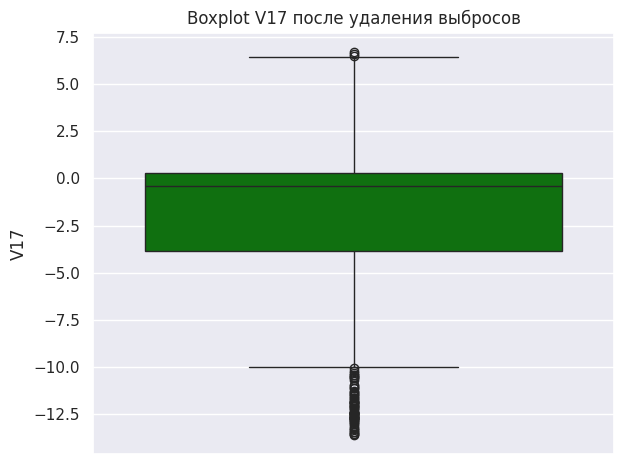

In [ ]:
# Созданим функцию для удаления выбросов

def Delete_Outliers(data):
  q1 = np.quantile(data, 0.25)
  q3 = np.quantile(data, 0.75)
  iqr = q3 - q1
  lower = q1 - iqr * 1.5
  upper = q3 + iqr * 1.5
  return data[(data >= lower) & (data <= upper)]



# Создаём новый датасет без выбросов
df = pd.DataFrame(new_df)
df_not_outliers = df.copy()

for i in features:
  df_not_outliers[i] = Delete_Outliers(df_not_outliers[i])


# Boxplot для признака до удаления и после удаления соответственно

for i in features:
  sns.boxplot(y = df[i], color = 'red') # до удаления выбросов
  plt.title(f'Boxplot {i} до удаления выбросов')
  plt.tight_layout()
  plt.show()

  sns.boxplot(y = df_not_outliers[i], color = 'green') # после удаления выбросов
  plt.title(f'Boxplot {i} после удаления выбросов')
  plt.tight_layout()
  plt.show()

In [ ]:
df_not_outliers.info()

<class 'pandas.core.frame.DataFrame'>
Index: 984 entries, 103040 to 43428
Data columns (total 31 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Time    984 non-null    float64
 1   V1      984 non-null    float64
 2   V2      984 non-null    float64
 3   V3      984 non-null    float64
 4   V4      984 non-null    float64
 5   V5      984 non-null    float64
 6   V6      984 non-null    float64
 7   V7      984 non-null    float64
 8   V8      984 non-null    float64
 9   V9      984 non-null    float64
 10  V10     905 non-null    float64
 11  V11     984 non-null    float64
 12  V12     941 non-null    float64
 13  V13     984 non-null    float64
 14  V14     976 non-null    float64
 15  V15     984 non-null    float64
 16  V16     921 non-null    float64
 17  V17     901 non-null    float64
 18  V18     984 non-null    float64
 19  V19     984 non-null    float64
 20  V20     984 non-null    float64
 21  V21     984 non-null    float64
 22  

In [ ]:
# теперь у нас в датафрейме new_df будут лежать данные без выбросов.

new_df = new_df_without_outliers

### Понижение размерности и кластеризация

Для того, чтобы убедиться, что наши классы являются разделимыми (иначе строить модели нет смысла), выполним кластеризацию с помощью трех различных техник кластеризации.

In [ ]:
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA, TruncatedSVD

X = new_df.drop('Class', axis=1)
y = new_df['Class']

X.drop(['Time','Amount'], axis=1, inplace=True) # Tак как Time и Amount не коррелируют почти с таргетом

X = X.dropna()

# T-SNE алгоритм
t0 = time.time()
X_reduced_tsne = TSNE(n_components=2, random_state=42).fit_transform(X)

t1 = time.time()
print("T-SNE заняло {:.2} сек".format(t1 - t0))

# PCA алгоритм
t0 = time.time()
Ь
X_reduced_pca = PCA(n_components=2, random_state=42).fit_transform(X)
t1 = time.time()
print("PCA заняло {:.2} сек".format(t1 - t0))

# TruncatedSVD алгоритм
t0 = time.time()

X_reduced_svd = TruncatedSVD(n_components=2, random_state=42).fit_transform(X)
t1 = time.time()
print("Truncated SVD заняло {:.2} сек".format(t1 - t0))


T-SNE заняло 1.1e+01 сек
PCA заняло 0.0039 сек
Truncated SVD заняло 0.094 сек


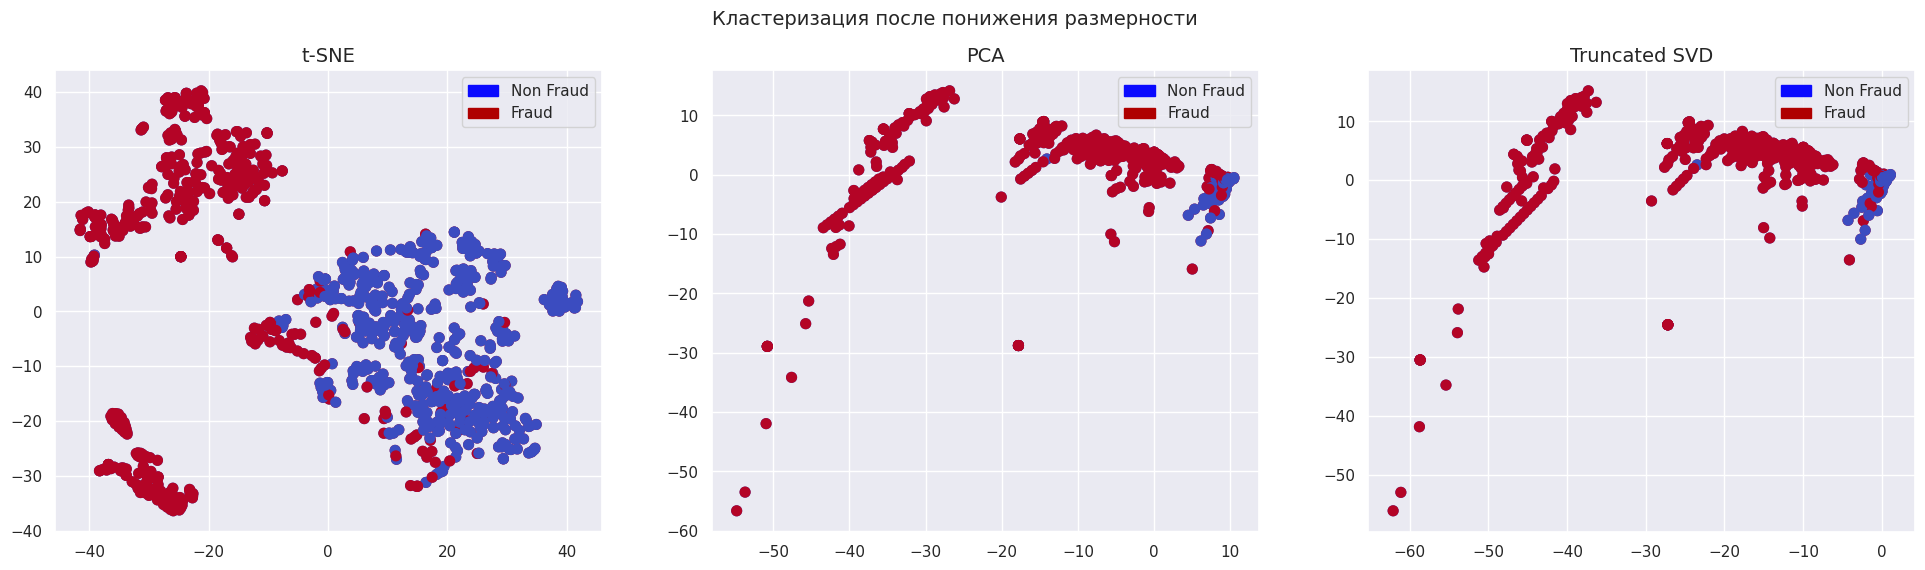

In [ ]:
f, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(24,6))
f.suptitle('Кластеризация после понижения размерности', fontsize=14)


blue_patch = mpatches.Patch(color='#0A0AFF', label='Non Fraud')
red_patch = mpatches.Patch(color='#AF0000', label='Fraud')


# t-SNE scatter plot
ax1.scatter(X_reduced_tsne[:,0], X_reduced_tsne[:,1], c=(y == 0), cmap='coolwarm', label='Non Fraud', linewidths=2)
ax1.scatter(X_reduced_tsne[:,0], X_reduced_tsne[:,1], c=(y == 1), cmap='coolwarm', label='Fraud', linewidths=2)
ax1.set_title('t-SNE', fontsize=14)

ax1.grid(True)

ax1.legend(handles=[blue_patch, red_patch])


# PCA scatter plot
ax2.scatter(X_reduced_pca[:,0], X_reduced_pca[:,1], c=(y == 0), cmap='coolwarm', label='Non Fraud', linewidths=2)
ax2.scatter(X_reduced_pca[:,0], X_reduced_pca[:,1], c=(y == 1), cmap='coolwarm', label='Fraud', linewidths=2)
ax2.set_title('PCA', fontsize=14)

ax2.grid(True)

ax2.legend(handles=[blue_patch, red_patch])


# TruncatedSVD scatter plot
ax3.scatter(X_reduced_svd[:,0], X_reduced_svd[:,1], c=(y == 0), cmap='coolwarm', label='Non Fraud', linewidths=2)
ax3.scatter(X_reduced_svd[:,0], X_reduced_svd[:,1], c=(y == 1), cmap='coolwarm', label='Fraud', linewidths=2)
ax3.set_title('Truncated SVD', fontsize=14)

ax3.grid(True)

ax3.legend(handles=[blue_patch, red_patch])

plt.show()

<h3> Выводы: </h3>
<ul>
<li>Алгоритм t-SNE может довольно точно кластеризовать случаи мошенничества и не мошенничества в нашем наборе данных. </li>
<li> Классы целевой переменной однозначно разделимы, а значит мы можем строить модели! </li>
</ul>

In [ ]:
new_df.to_csv('/content/drive/MyDrive/ColabNotebooks/MLandNeuro/creditcard_short.csv')